In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [1]:
!pip install tensorflow numpy matplotlib pillow seaborn


In [2]:
import os
import pandas as pd

dataset_path = "/Users/lucky/Desktop/plant/Plant_leave_diseases_dataset_with_augmentation"
os.listdir(dataset_path)


['Strawberry___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Tomato___Target_Spot',
 'Peach___healthy',
 'Potato___Late_blight',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Pepper,_bell___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___Leaf_Mold',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Apple___Cedar_apple_rust',
 'Tomato___Bacterial_spot',
 'Grape___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Early_blight',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy',
 'Tomato___healthy',
 'Corn___Northern_Leaf_Blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Cherry___healthy',
 'Apple___Apple_scab',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Corn___Common_rust',
 'Background_without_leaves',
 'Peach___Bacterial_spot',
 'Pepper,_bell___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Corn___healthy',
 'Squash___Powdery_mildew',
 'Apple___Black

In [3]:
import os
import pandas as pd

dataset_path = "/Users/lucky/Desktop/plant/Plant_leave_diseases_dataset_with_augmentation"

class_counts = []

for disease_class in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, disease_class)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts.append({'Class': disease_class, 'Images': num_images})

df = pd.DataFrame(class_counts)
print(df)


                                            Class  Images
0                            Strawberry___healthy    1000
1                               Grape___Black_rot    1180
2                           Potato___Early_blight    1000
3                             Blueberry___healthy    1502
4                         Cherry___Powdery_mildew    1052
5                            Tomato___Target_Spot    1404
6                                 Peach___healthy    1000
7                            Potato___Late_blight    1000
8                            Tomato___Late_blight    1909
9                    Tomato___Tomato_mosaic_virus    1000
10                         Pepper,_bell___healthy    1478
11       Orange___Haunglongbing_(Citrus_greening)    5507
12                             Tomato___Leaf_Mold    1000
13     Grape___Leaf_blight_(Isariopsis_Leaf_Spot)    1076
14                       Apple___Cedar_apple_rust    1000
15                        Tomato___Bacterial_spot    2127
16            

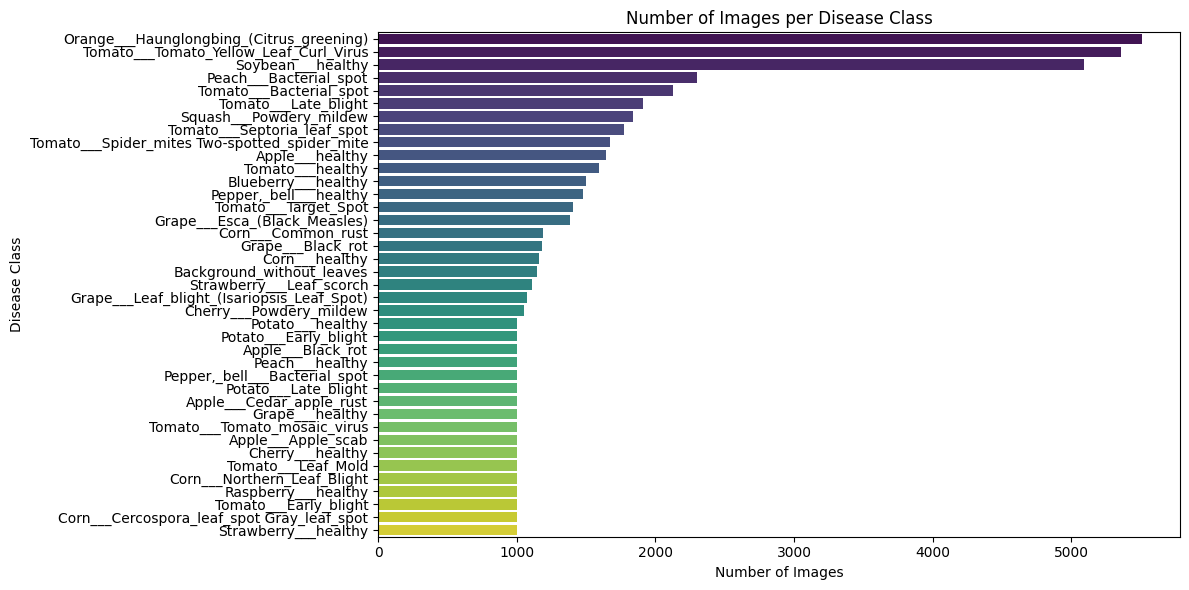

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values('Images', ascending=False), x='Images', y='Class',hue='Class', palette='viridis',legend=False)
plt.title("Number of Images per Disease Class")
plt.xlabel("Number of Images")
plt.ylabel("Disease Class")
plt.tight_layout()
plt.show()

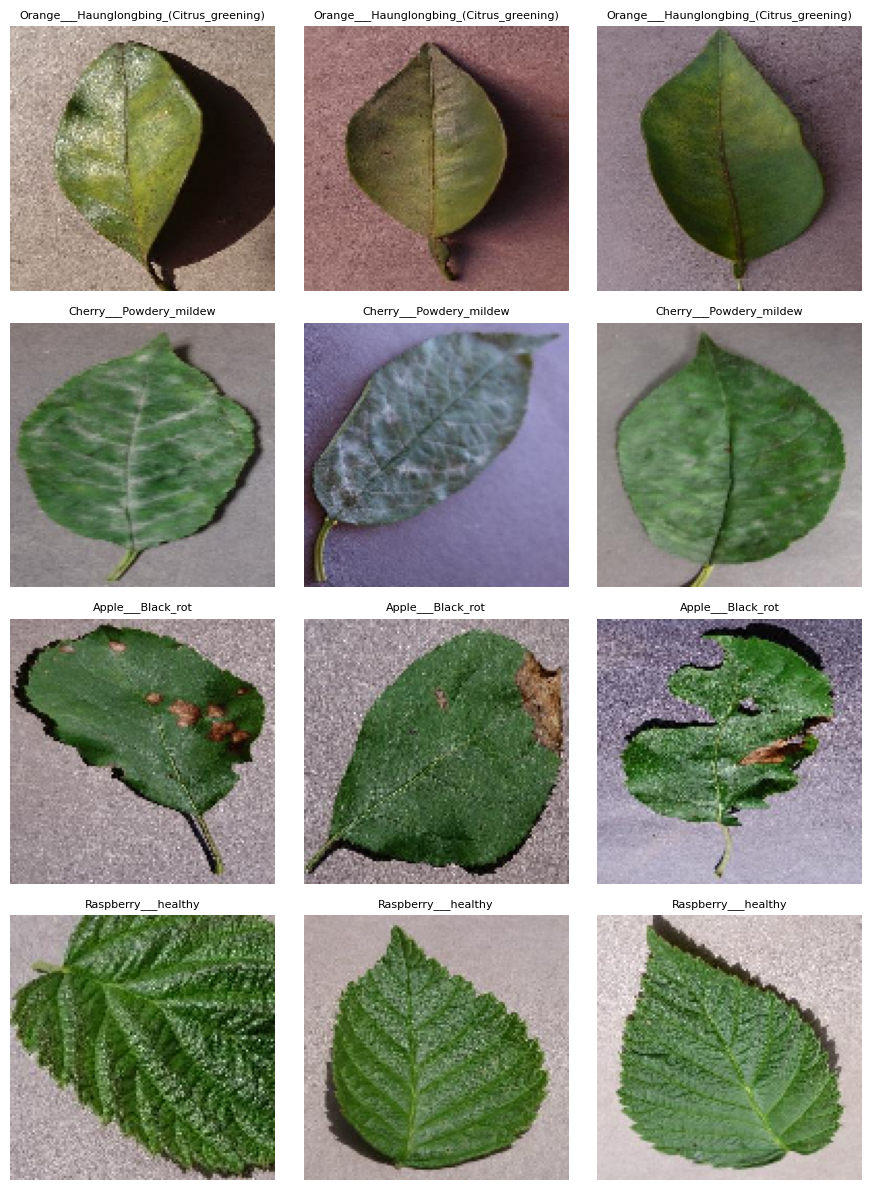

In [9]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import random

def show_random_images(dataset_path, num_classes=4, images_per_class=3):
    classes = random.sample(os.listdir(dataset_path), num_classes)
    
    plt.figure(figsize=(images_per_class * 3, num_classes * 3))
    for class_idx, disease_class in enumerate(classes):
        class_path = os.path.join(dataset_path, disease_class)
        images = random.sample(os.listdir(class_path), images_per_class)
        
        for img_idx, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(128, 128))
            plt.subplot(num_classes, images_per_class, class_idx * images_per_class + img_idx + 1)
            plt.imshow(img)
            plt.title(disease_class, fontsize=8)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

show_random_images(dataset_path)


In [10]:
total_images = df['Images'].sum()
num_classes = df.shape[0]

print(f"Total number of classes: {num_classes}")
print(f"Total number of images: {total_images}")
print("\nClass Distribution:")
print(df.sort_values("Images", ascending=False))


Total number of classes: 39
Total number of images: 61486

Class Distribution:
                                            Class  Images
11       Orange___Haunglongbing_(Citrus_greening)    5507
23         Tomato___Tomato_Yellow_Leaf_Curl_Virus    5357
38                              Soybean___healthy    5090
29                         Peach___Bacterial_spot    2297
15                        Tomato___Bacterial_spot    2127
8                            Tomato___Late_blight    1909
33                        Squash___Powdery_mildew    1835
31                    Tomato___Septoria_leaf_spot    1771
26  Tomato___Spider_mites Two-spotted_spider_mite    1676
35                                Apple___healthy    1645
21                               Tomato___healthy    1591
3                             Blueberry___healthy    1502
10                         Pepper,_bell___healthy    1478
5                            Tomato___Target_Spot    1404
19                   Grape___Esca_(Black_Measles)  

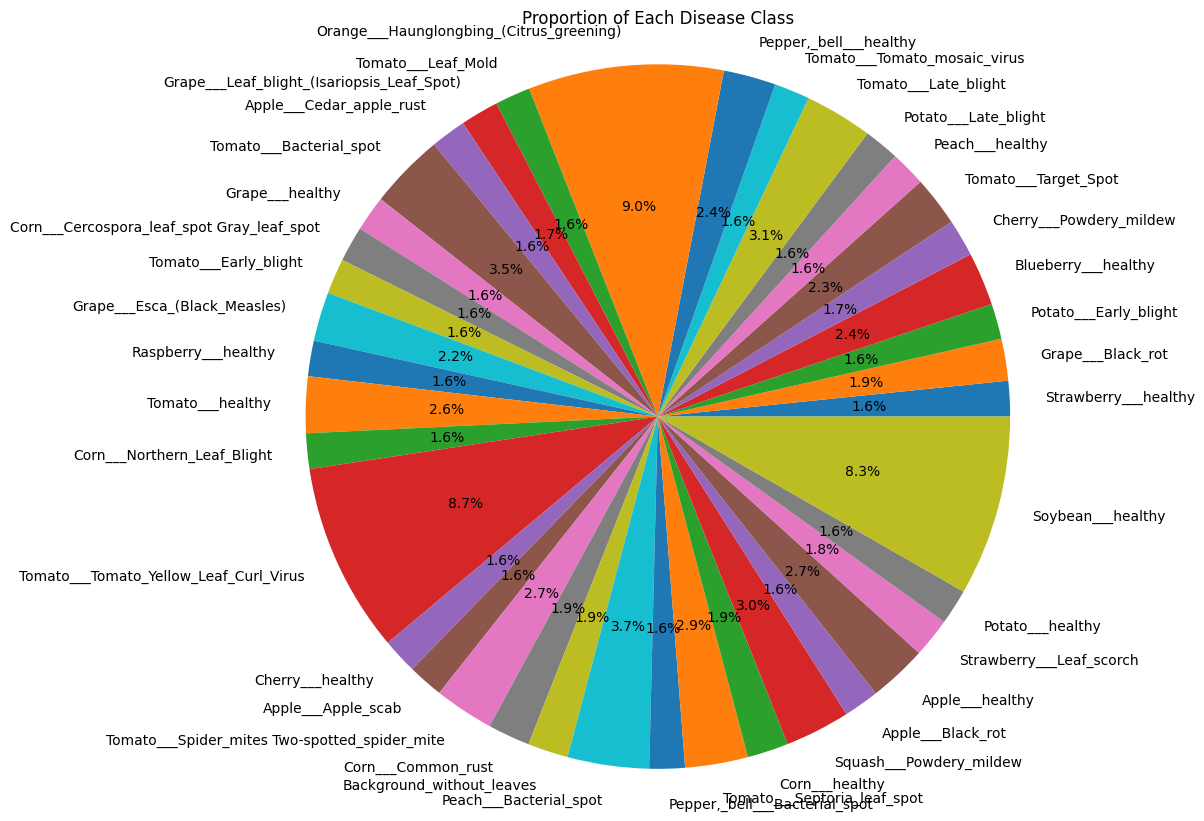

In [11]:
plt.figure(figsize=(10, 10))
plt.pie(df['Images'], labels=df['Class'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Each Disease Class')
plt.show()


In [12]:
import os
import shutil
import random

# Source dataset path
source_path = "/Users/lucky/Desktop/plant/Plant_leave_diseases_dataset_with_augmentation"
# Target root directory
target_root = '/Users/lucky/Desktop/plant/plant_dataset_split'

# Split ratios
train_ratio = 0.8
val_ratio = 0.15
test_ratio = 0.5

# Create split folders
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(target_root, split), exist_ok=True)

# Split and copy files
for class_name in os.listdir(source_path):
    class_path = os.path.join(source_path, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)

    train_count = int(train_ratio * len(images))
    val_count = int(val_ratio * len(images))

    split_data = {
        'train': images[:train_count],
        'val': images[train_count:train_count + val_count],
        'test': images[train_count + val_count:]
    }

    for split, image_list in split_data.items():
        split_dir = os.path.join(target_root, split, class_name)
        os.makedirs(split_dir, exist_ok=True)
        for img_name in image_list:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(split_dir, img_name)
            shutil.copy(src, dst)

print("✅ Dataset split successfully!")


✅ Dataset split successfully!


In [13]:
import os
import pandas as pd

data = []

root_dir = "/Users/lucky/Desktop/plant/plant_dataset_split/train"

for class_name in os.listdir(root_dir):
    class_folder = os.path.join(root_dir, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            data.append({'image': img_path, 'label': class_name})

df_train = pd.DataFrame(data)
print(df_train.head())


                                               image                 label
0  /Users/lucky/Desktop/plant/plant_dataset_split...  Strawberry___healthy
1  /Users/lucky/Desktop/plant/plant_dataset_split...  Strawberry___healthy
2  /Users/lucky/Desktop/plant/plant_dataset_split...  Strawberry___healthy
3  /Users/lucky/Desktop/plant/plant_dataset_split...  Strawberry___healthy
4  /Users/lucky/Desktop/plant/plant_dataset_split...  Strawberry___healthy


In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Config
target_class = 'Tomato___Late_blight'
image_size = (64, 64)  # smaller size for faster processing
dataset_path = "/Users/lucky/Desktop/plant/plant_dataset_split/train"

X = []
y = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_path):
        continue
    label = 1 if class_name == target_class else 0  # Binary label
    for image_name in tqdm(os.listdir(class_path), desc=f'Loading {class_name}'):
        image_path = os.path.join(class_path, image_name)
        try:
            img = load_img(image_path, target_size=image_size)
            img_array = img_to_array(img).flatten()  # flatten to 1D
            X.append(img_array)
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)

print(f"Total samples: {len(X)}, Positive class samples: {np.sum(y)}")


2025-06-06 18:14:24.921836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loading Pepper,_bell___healthy: 100%|██████| 1182/1182 [00:02<00:00, 574.28it/s]
Loading Orange___Haunglongbing_(Citrus_greening): 100%|█| 4405/4405 [00:07<00:00
Loading Tomato___Leaf_Mold: 100%|████████████| 800/800 [00:01<00:00, 598.58it/s]
Loading Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 100%|█| 860/860 [00:01<00:00
Loading Grape___healthy: 100%|███████████████| 800/800 [00:01<00:00, 665.44it/s]
Loading Corn___Cercospora_leaf_spot Gray_leaf_spot: 100%|█| 800/800 [00:01<00:00
Loading Tomato___Early_blight: 100%|█████████| 800/800 [00:01<00:00, 582.78it/s]
Loading Grape___Esca_(Black_Measles): 100%|█| 1106/1106 [00:01<00:00, 566.91it/s
Loading Corn___Northern_Leaf_Blight: 100

Total samples: 49179, Positive class samples: 1527


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train binary classifier using SGD
clf = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['Other', target_class]))


                      precision    recall  f1-score   support

               Other       0.97      0.99      0.98      9531
Tomato___Late_blight       0.35      0.17      0.23       305

            accuracy                           0.96      9836
           macro avg       0.66      0.58      0.61      9836
        weighted avg       0.95      0.96      0.96      9836



In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [11]:
cm = confusion_matrix(y_test, y_pred)

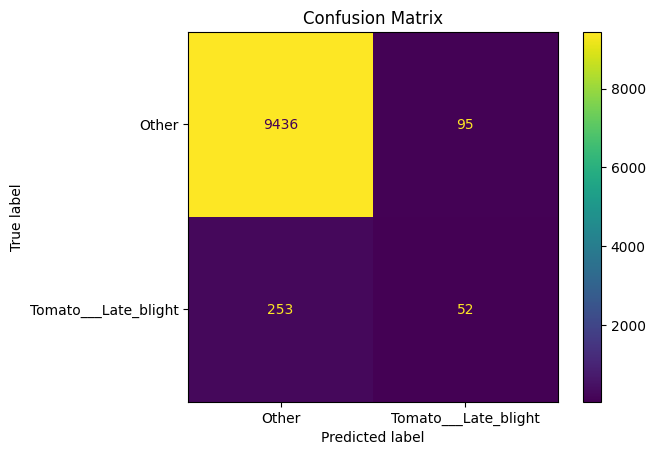

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Other', 'Tomato___Late_blight'])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()
